## HCP in scanner task 

In this XP I'll will explore HCP in scanner task performace for the listed domaine :
- Emotion
- Gambling
- Working memory
- Social
- Language
- Relational


In [1]:
%matplotlib inline
import os
import numpy as np
import scipy
from scipy import stats, integrate
from scipy import cluster as scl
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn.apionly as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec as gs
import scipy.io as sio
from IPython.display import display# load good stuff


/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
%load_ext oct2py.ipython

In [3]:
# Load pheno file
#path_root = '/media/yassinebha/database29/Drive/HCP/'
path_root = '/home/yassinebha/data/data_disk/Drive/HCP2/'
path_pheno = os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/pheno_yu_predic/')
data = pd.merge(pd.read_csv(os.path.join(path_pheno,'RESTRICTED_yuzhang_4_16_2019_10_53_20.csv')),
                pd.read_csv(os.path.join(path_pheno,'unrestricted_yuzhang_4_16_2019_10_51_46.csv')),how = 'left', on= 'Subject')
#data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/pheno_yu_predic/hcp_all_pheno.csv'))

In [4]:
data.head()

Subject  Age_in_Yrs  HasGT ZygositySR ZygosityGT    Family_ID  Mother_ID  \
0   100004          24   True    NotTwin             52259_82122      52259   
1   100206          27   True    NotTwin             56037_85858      56037   
2   100307          27   True      NotMZ         MZ  51488_81352      51488   
3   100408          33   True         MZ         MZ  51730_81594      51730   
4   100610          27   True      NotMZ         DZ  52813_82634      52813   

   Father_ID  TestRetestInterval   Race     ...     Noise_Comp  Odor_Unadj  \
0      82122                 NaN  White     ...            5.2      101.12   
1      85858                 NaN  White     ...            6.0      108.79   
2      81352                 NaN  White     ...            3.6      101.12   
3      81594                 NaN  White     ...            2.0      108.79   
4      82634                 NaN  White     ...            2.0      122.25   

   Odor_AgeAdj  PainIntens_RawScore  PainInterf_Tscore  Taste_Unadj  \
0        86.45                  2.0               45.9       107.17   
1        97.19                  1.0               49.7        72.63   
2        86.45                  0.0               38.6        71.69   
3        98.04                  2.0               52.6       114.01   
4       110.45                  0.0               38.6        84.84   

   Taste_AgeAdj  Mars_Log_Score  Mars_Errs  Mars_Final  
0        105.31            1.80        0.0        1.80  
1         72.03            1.84        0.0        1.84  
2         71.76            1.76        0.0        1.76  
3        113.59            1.76        2.0        1.68  
4         85.31            1.92        1.0        1.88  

[5 rows x 782 columns]

# Emotion Task

In [5]:
behav_emo = ["Emotion_Task_Acc","Emotion_Task_Median_RT","Emotion_Task_Face_Acc","Emotion_Task_Face_Median_RT",
               "Emotion_Task_Shape_Acc","Emotion_Task_Shape_Median_RT"]
data_emo = data.get(behav_emo)

Shapiro-test


DF  Test Statistic       p-value
Emotion_Task_Acc              1048        0.502845  0.000000e+00
Emotion_Task_Median_RT        1048        0.972347  2.978292e-13
Emotion_Task_Face_Acc         1048        0.428902  0.000000e+00
Emotion_Task_Face_Median_RT   1048        0.962243  7.665693e-16
Emotion_Task_Shape_Acc        1048        0.603179  1.093013e-43
Emotion_Task_Shape_Median_RT  1048        0.972565  3.438707e-13

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


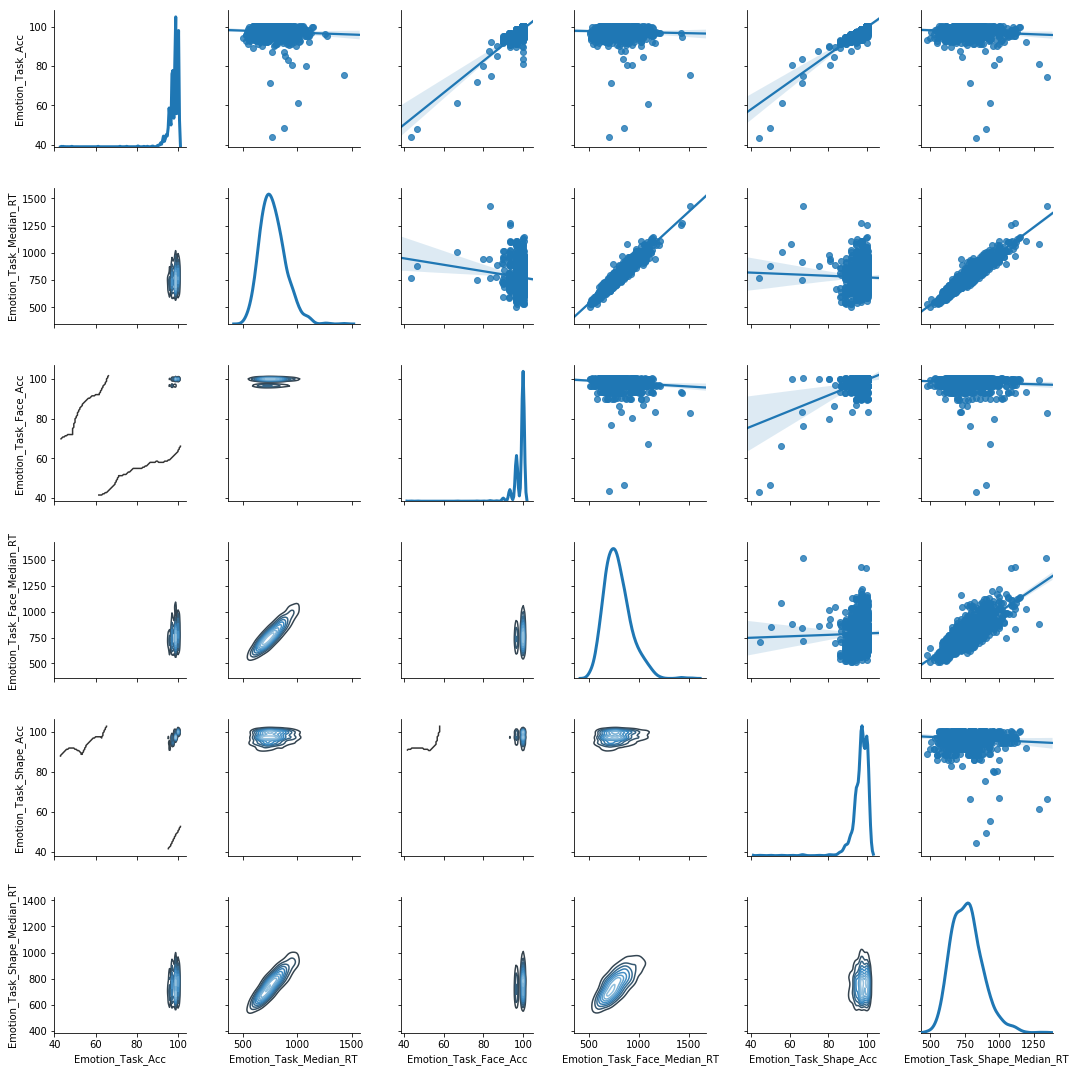

In [6]:
# Test for normality
x = data_emo.Emotion_Task_Acc.dropna()
y = data_emo.Emotion_Task_Median_RT.dropna()
z = data_emo.Emotion_Task_Face_Acc.dropna()
u = data_emo.Emotion_Task_Face_Median_RT.dropna()
v = data_emo.Emotion_Task_Shape_Acc.dropna()
w = data_emo.Emotion_Task_Shape_Median_RT.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              ],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       ]}
df = pd.DataFrame(dict_sw,index=["Emotion_Task_Acc","Emotion_Task_Median_RT","Emotion_Task_Face_Acc","Emotion_Task_Face_Median_RT",
                                 "Emotion_Task_Shape_Acc","Emotion_Task_Shape_Median_RT"])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emo.get(["Emotion_Task_Acc","Emotion_Task_Median_RT","Emotion_Task_Face_Acc","Emotion_Task_Face_Median_RT",
                                 "Emotion_Task_Shape_Acc","Emotion_Task_Shape_Median_RT"]).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

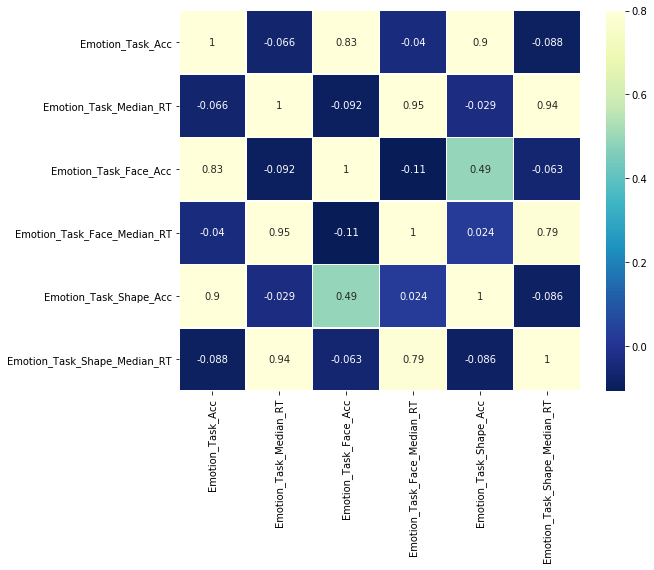

In [7]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_emo.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

# Gambling Task

In [9]:
behav_gam = ["Gambling_Task_Perc_Larger","Gambling_Task_Perc_Smaller","Gambling_Task_Perc_NLR","Gambling_Task_Median_RT_Larger",
             "Gambling_Task_Median_RT_Smaller","Gambling_Task_Reward_Perc_Larger","Gambling_Task_Reward_Median_RT_Larger",
             "Gambling_Task_Reward_Perc_Smaller","Gambling_Task_Reward_Median_RT_Smaller","Gambling_Task_Reward_Perc_NLR",
             "Gambling_Task_Punish_Perc_Larger","Gambling_Task_Punish_Median_RT_Larger","Gambling_Task_Punish_Perc_Smaller",
             "Gambling_Task_Punish_Median_RT_Smaller","Gambling_Task_Punish_Perc_NLR"]
data_gam = data.get(behav_gam)

Shapiro-test


/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


DF  Test Statistic       p-value
Gambling_Task_Perc_Larger               1087        0.918614  9.594890e-24
Gambling_Task_Perc_Smaller              1087        0.918615  9.600147e-24
Gambling_Task_Perc_NLR                  1087        1.000000  1.000000e+00
Gambling_Task_Median_RT_Larger          1075        0.951757  2.605738e-18
Gambling_Task_Median_RT_Smaller         1084        0.946881  2.559171e-19
Gambling_Task_Reward_Perc_Larger        1087        0.941100  2.286830e-20
Gambling_Task_Reward_Median_RT_Larger   1064        0.952262  4.136966e-18
Gambling_Task_Reward_Perc_Smaller       1087        0.941098  2.285110e-20
Gambling_Task_Reward_Median_RT_Smaller  1079        0.948779  6.416380e-19
Gambling_Task_Reward_Perc_NLR           1087        1.000000  1.000000e+00
Gambling_Task_Punish_Perc_Larger        1087        0.949192  6.462986e-19
Gambling_Task_Punish_Median_RT_Larger   1075        0.944349  1.093512e-19
Gambling_Task_Punish_Perc_Smaller       1087        0.949195  6.470685e-19
Gambling_Task_Punish_Median_RT_Smaller  1084        0.944364  9.011054e-20
Gambling_Task_Punish_Perc_NLR           1087        1.000000  1.000000e+00

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())

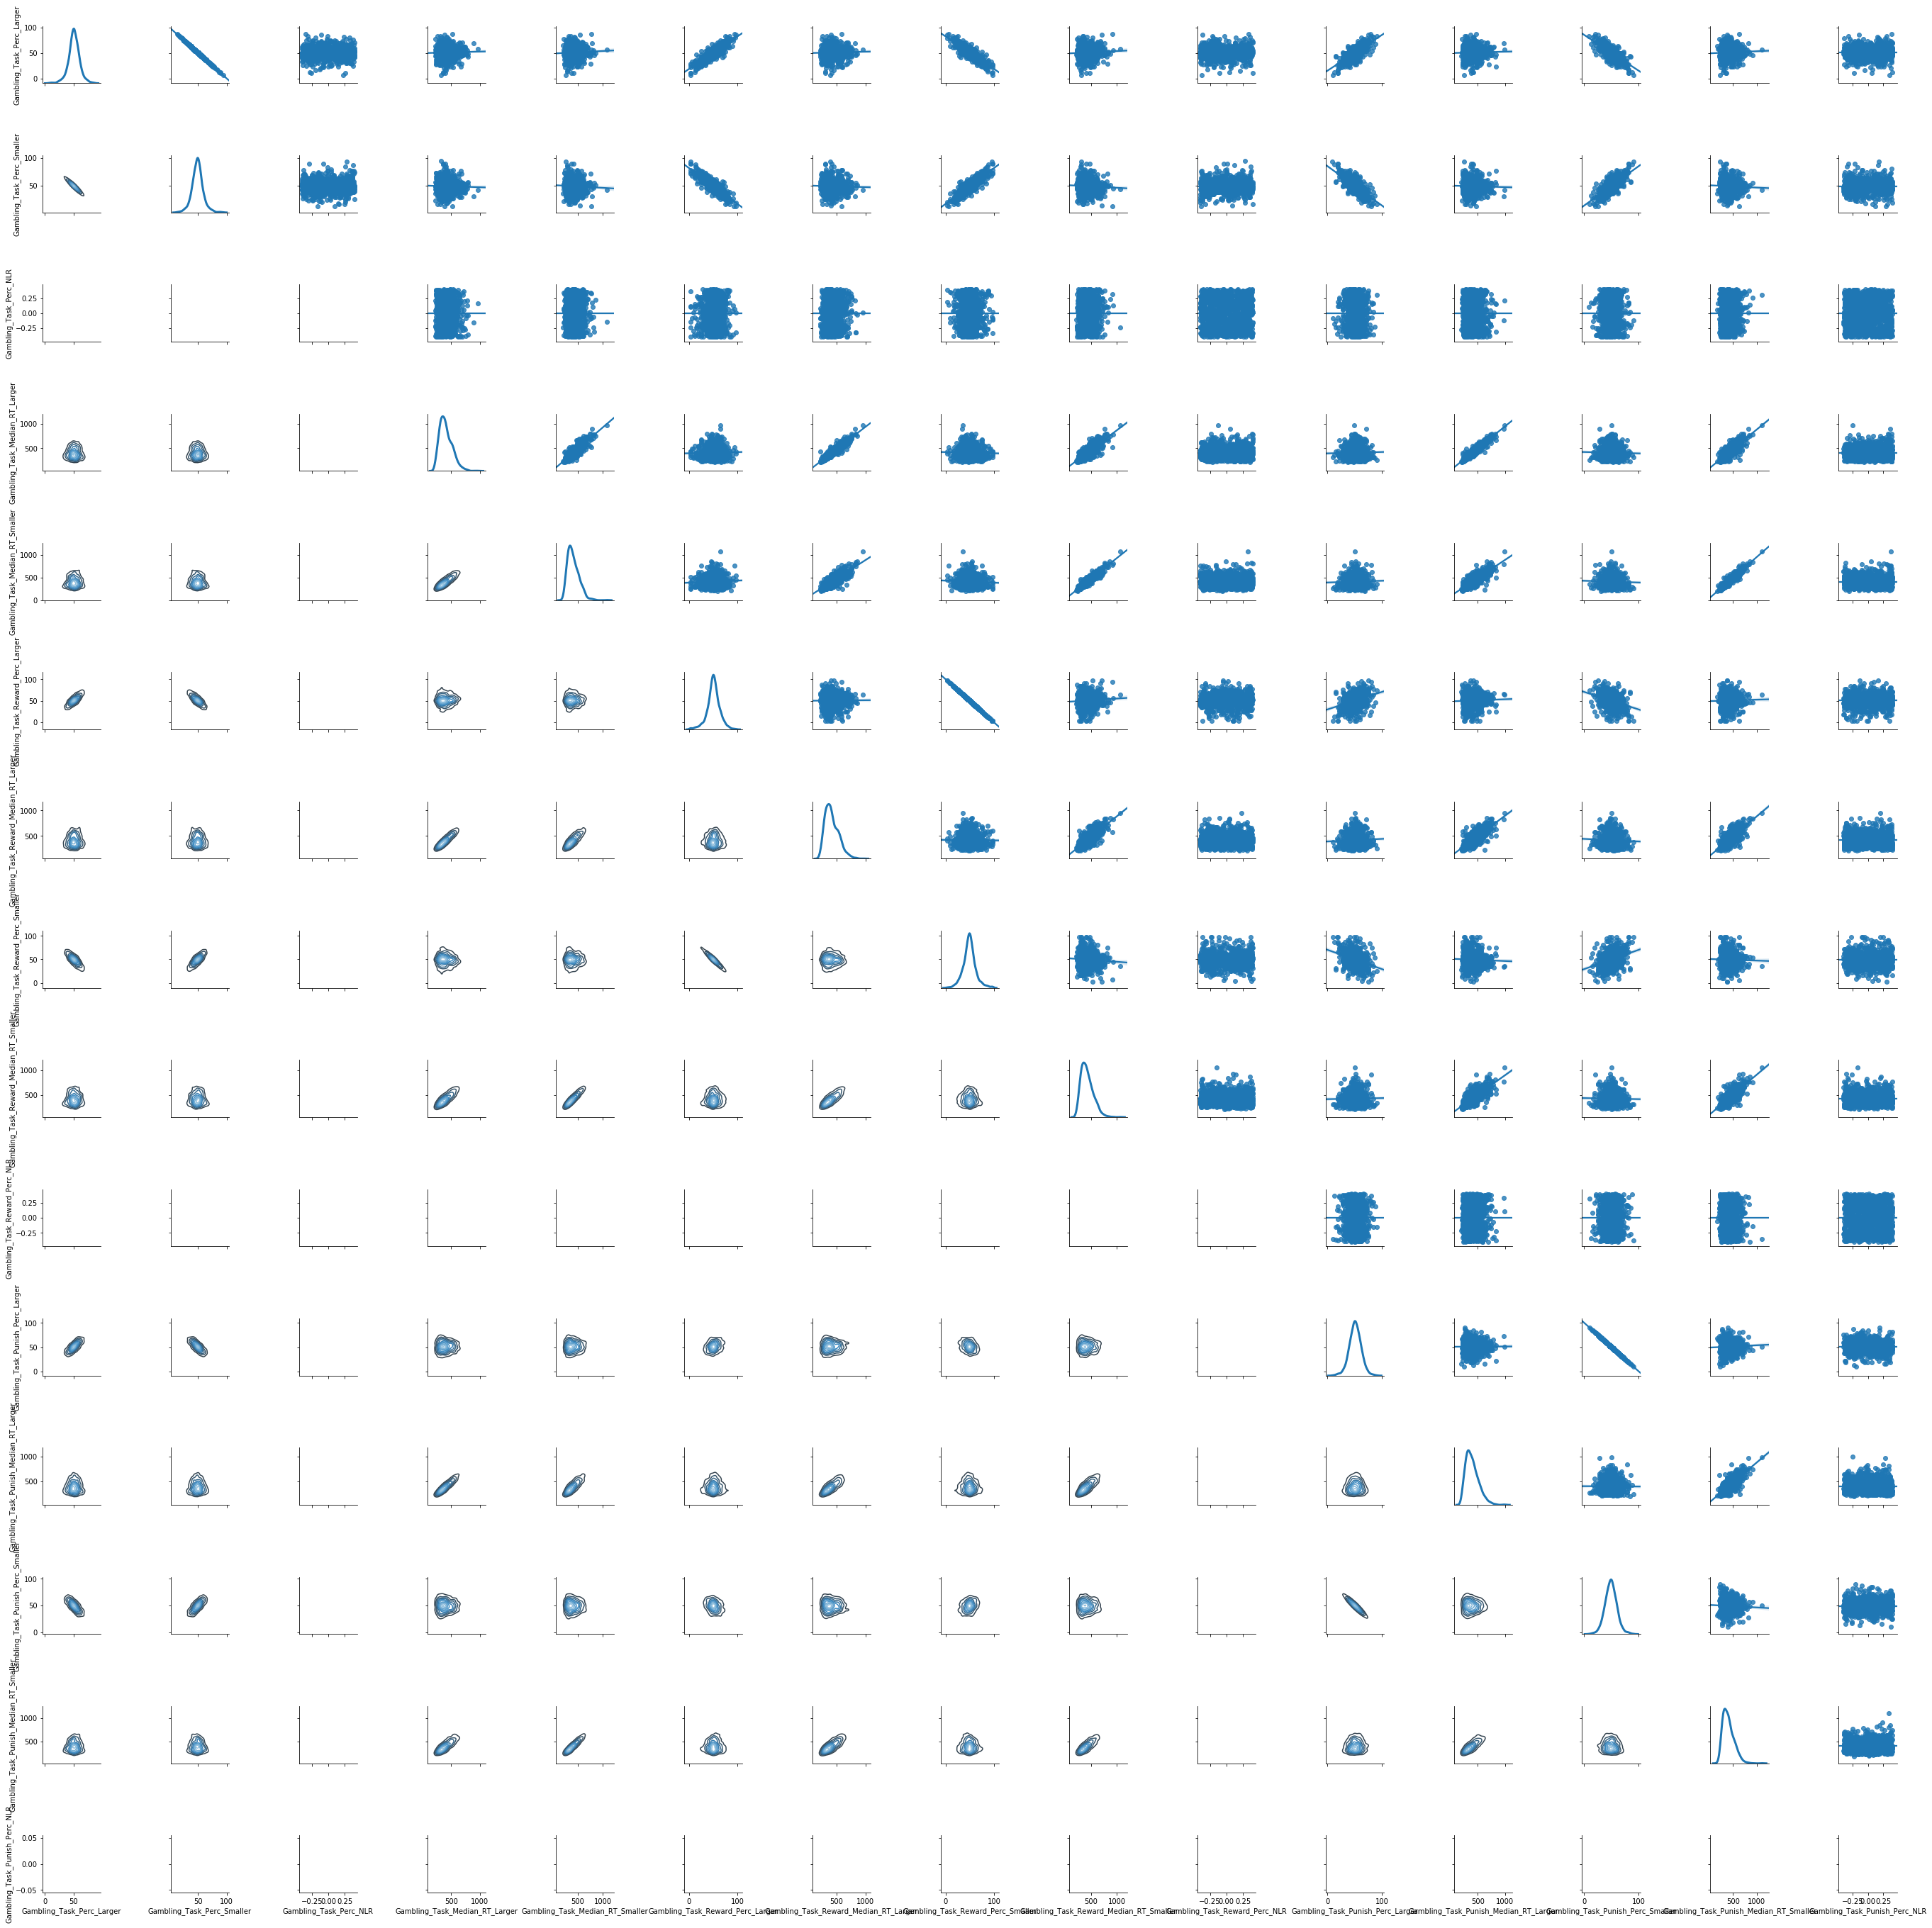

In [10]:
# Test for normality
x = data_gam.Gambling_Task_Perc_Larger.dropna()
y = data_gam.Gambling_Task_Perc_Smaller.dropna()
z = data_gam.Gambling_Task_Perc_NLR.dropna()
u = data_gam.Gambling_Task_Median_RT_Larger.dropna()
v = data_gam.Gambling_Task_Median_RT_Smaller.dropna()
w = data_gam.Gambling_Task_Reward_Perc_Larger.dropna()
a = data_gam.Gambling_Task_Reward_Median_RT_Larger.dropna()
b = data_gam.Gambling_Task_Reward_Perc_Smaller.dropna()
c = data_gam.Gambling_Task_Reward_Median_RT_Smaller.dropna()
d = data_gam.Gambling_Task_Reward_Perc_NLR.dropna()
e = data_gam.Gambling_Task_Punish_Perc_Larger.dropna()
f = data_gam.Gambling_Task_Punish_Median_RT_Larger.dropna()
g = data_gam.Gambling_Task_Punish_Perc_Smaller.dropna()
h = data_gam.Gambling_Task_Punish_Median_RT_Smaller.dropna()
i = data_gam.Gambling_Task_Punish_Perc_NLR.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)
shapiro_results_a = scipy.stats.shapiro(a)
shapiro_results_b = scipy.stats.shapiro(b)
shapiro_results_c = scipy.stats.shapiro(c)
shapiro_results_d = scipy.stats.shapiro(d)
shapiro_results_e = scipy.stats.shapiro(e)
shapiro_results_f = scipy.stats.shapiro(f)
shapiro_results_g = scipy.stats.shapiro(g)
shapiro_results_h = scipy.stats.shapiro(h)
shapiro_results_i = scipy.stats.shapiro(i)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1,len(a) - 1,len(b) - 1,len(c) - 1,len(d) - 1,
                 len(e) - 1,len(f) - 1,len(g) - 1,len(h) - 1,len(i) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              shapiro_results_a[0],shapiro_results_b[0],
                              shapiro_results_c[0],shapiro_results_d[0],
                              shapiro_results_e[0],shapiro_results_f[0],
                              shapiro_results_g[0],shapiro_results_h[0],
                              shapiro_results_i[0]
                              ],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       shapiro_results_a[1],shapiro_results_b[1],
                       shapiro_results_c[1],shapiro_results_d[1],
                       shapiro_results_e[1],shapiro_results_f[1],
                       shapiro_results_g[1],shapiro_results_h[1],
                       shapiro_results_i[1]
                       ]}
df = pd.DataFrame(dict_sw,index=behav_gam)
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_gam.get(behav_gam).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

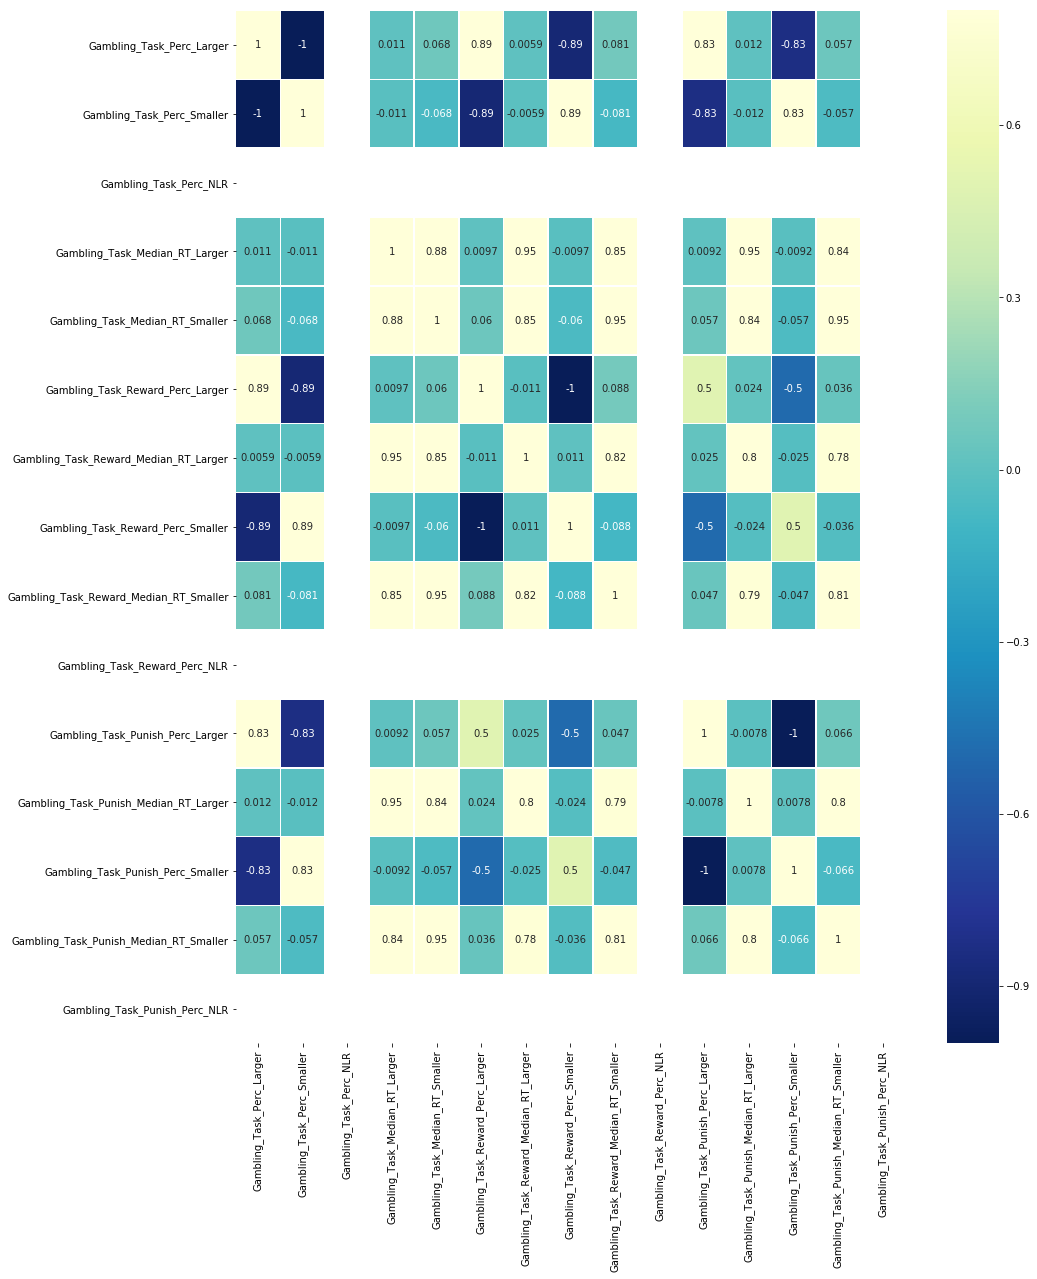

In [41]:
f, ax = plt.subplots(figsize=(15, 19))
sns.heatmap(data_gam.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

# Language Task

In [13]:
behav_lan = ["Language_Task_Acc",
"Language_Task_Median_RT",
"Language_Task_Story_Acc",
"Language_Task_Story_Median_RT",
"Language_Task_Story_Avg_Difficulty_Level",
"Language_Task_Math_Acc",
"Language_Task_Math_Median_RT",
"Language_Task_Math_Avg_Difficulty_Level",
]
data_lan = data.get(behav_lan)

Shapiro-test


DF  Test Statistic       p-value
Language_Task_Acc                         1053        0.966186  6.155517e-15
Language_Task_Median_RT                   1053        0.984515  3.857635e-09
Language_Task_Story_Acc                   1053        0.678363  1.112056e-40
Language_Task_Story_Median_RT             1053        0.970533  8.449619e-14
Language_Task_Story_Avg_Difficulty_Level  1053        0.958906  1.235369e-16
Language_Task_Math_Acc                    1053        0.974638  1.289172e-12
Language_Task_Math_Median_RT              1053        0.972502  3.018402e-13
Language_Task_Math_Avg_Difficulty_Level   1053        0.822142  1.322132e-32

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


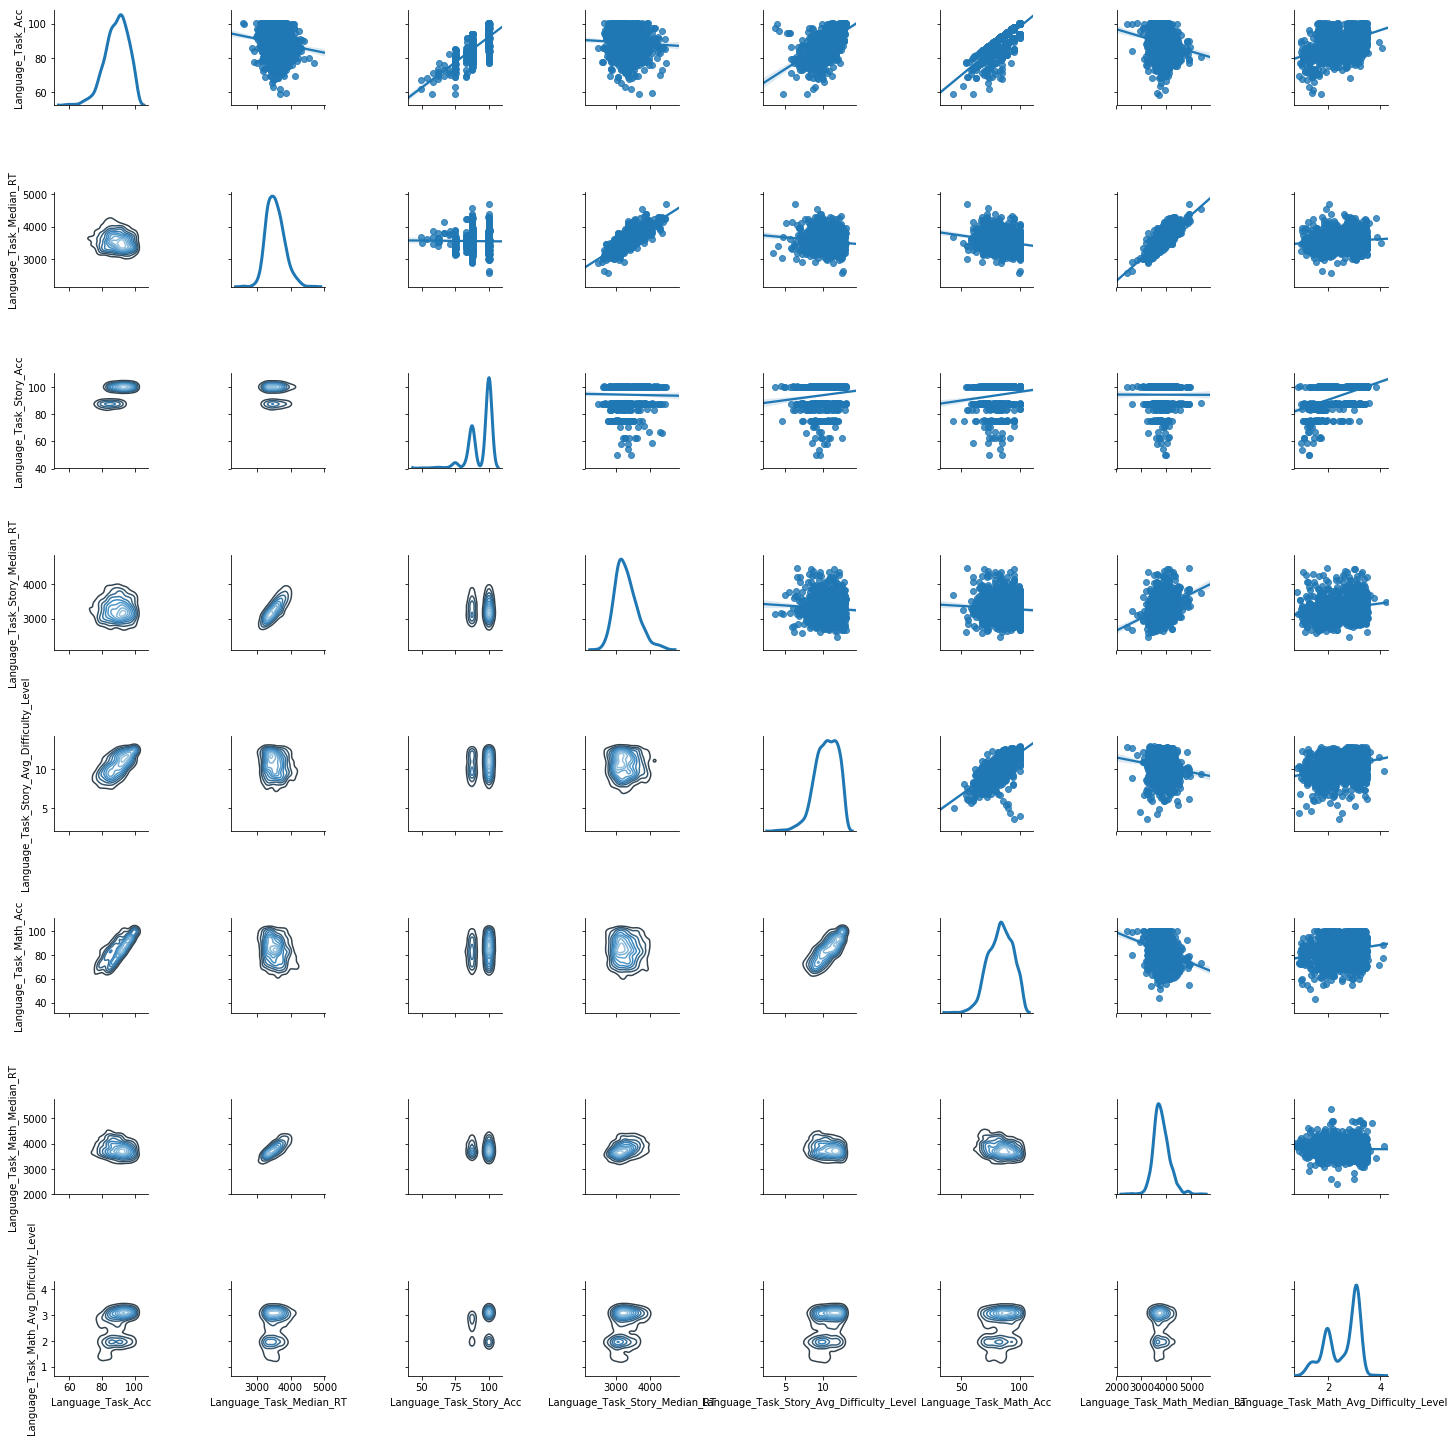

In [14]:
# Test for normality
x = data_lan.Language_Task_Acc.dropna()
y = data_lan.Language_Task_Median_RT.dropna()
z = data_lan.Language_Task_Story_Acc.dropna()
u = data_lan.Language_Task_Story_Median_RT.dropna()
v = data_lan.Language_Task_Story_Avg_Difficulty_Level.dropna()
w = data_lan.Language_Task_Math_Acc.dropna()
a = data_lan.Language_Task_Math_Median_RT.dropna()
b = data_lan.Language_Task_Math_Avg_Difficulty_Level.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)
shapiro_results_a = scipy.stats.shapiro(a)
shapiro_results_b = scipy.stats.shapiro(b)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1,len(a) - 1,len(b) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              shapiro_results_a[0],shapiro_results_b[0]
                              ],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       shapiro_results_a[1],shapiro_results_b[1]
                       ]}
df = pd.DataFrame(dict_sw,index=behav_lan)
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_lan.get(behav_lan).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

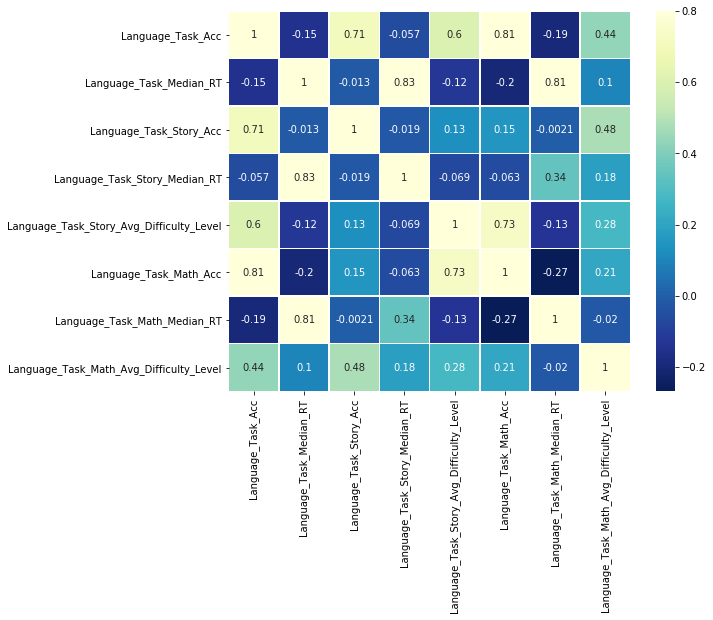

In [15]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_lan.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

# Relational Task

In [16]:
behav_rel = ["Relational_Task_Acc",
"Relational_Task_Median_RT",
"Relational_Task_Match_Acc",
"Relational_Task_Match_Median_RT",
"Relational_Task_Rel_Acc",
"Relational_Task_Rel_Median_RT"
]
data_rel = data.get(behav_rel)

Shapiro-test


DF  Test Statistic       p-value
Relational_Task_Acc              1044        0.983312  1.436115e-09
Relational_Task_Median_RT        1044        0.997495  1.086660e-01
Relational_Task_Match_Acc        1044        0.865020  4.747802e-29
Relational_Task_Match_Median_RT  1044        0.993504  1.602109e-04
Relational_Task_Rel_Acc          1044        0.977826  1.526877e-11
Relational_Task_Rel_Median_RT    1044        0.993868  2.751132e-04

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


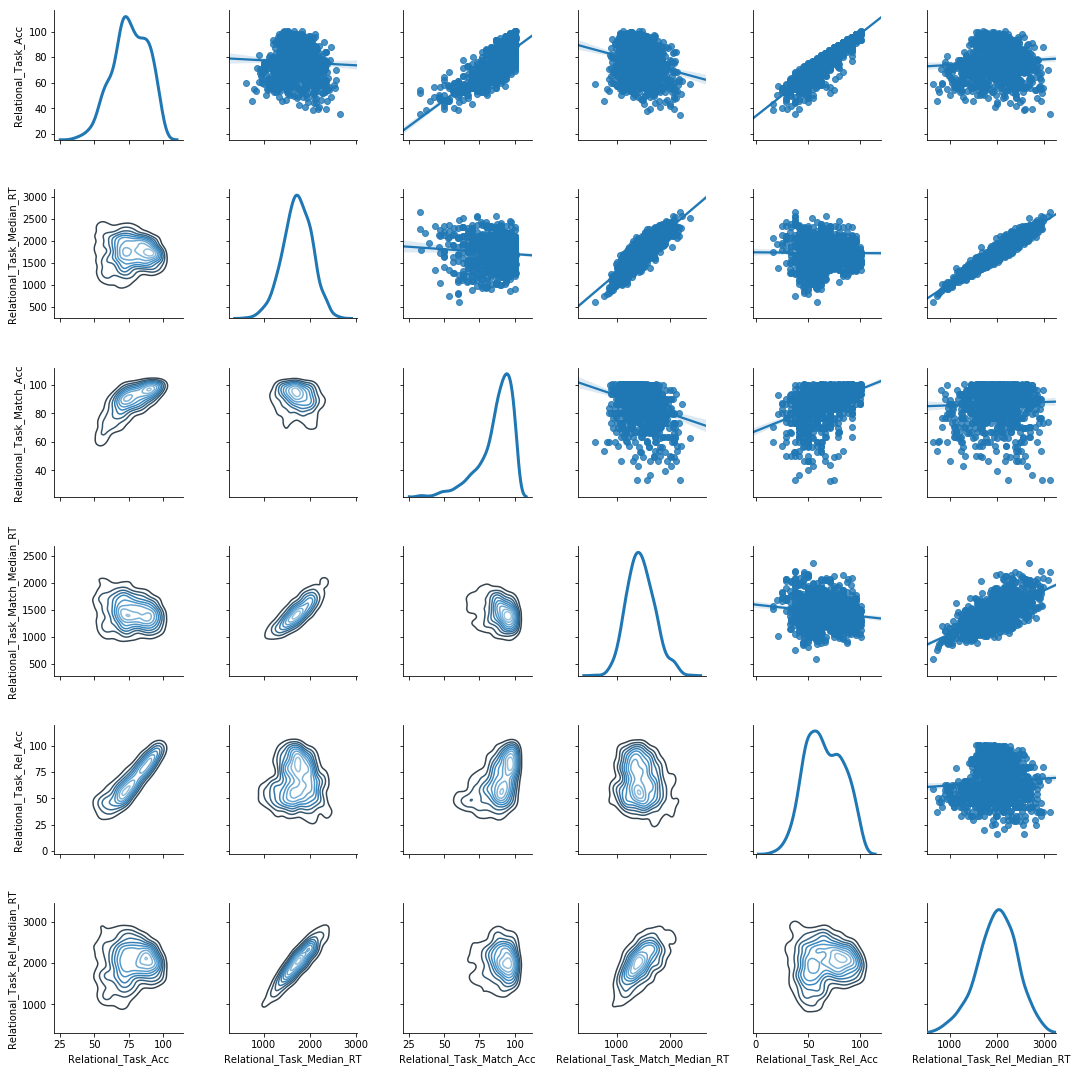

In [17]:
# Test for normality
x = data_rel.Relational_Task_Acc.dropna()
y = data_rel.Relational_Task_Median_RT.dropna()
z = data_rel.Relational_Task_Match_Acc.dropna()
u = data_rel.Relational_Task_Match_Median_RT.dropna()
v = data_rel.Relational_Task_Rel_Acc.dropna()
w = data_rel.Relational_Task_Rel_Median_RT.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0]
                              ],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1]
                       ]}
df = pd.DataFrame(dict_sw,index=behav_rel)
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_rel.get(behav_rel).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

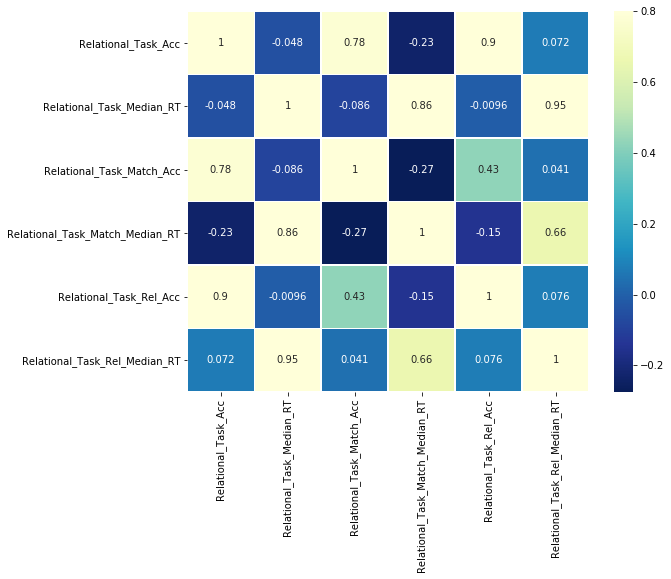

In [18]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_rel.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

# Social Task

In [21]:
behav_soc = ["Social_Task_Perc_Random",
"Social_Task_Perc_TOM",
"Social_Task_Perc_Unsure",
"Social_Task_Perc_NLR",
"Social_Task_Median_RT_Random",
"Social_Task_Median_RT_TOM",
"Social_Task_Median_RT_Unsure",
"Social_Task_Random_Perc_Random",
"Social_Task_Random_Median_RT_Random",
"Social_Task_Random_Perc_TOM",
"Social_Task_Random_Median_RT_TOM",
"Social_Task_Random_Perc_Unsure",
"Social_Task_Random_Median_RT_Unsure",
"Social_Task_Random_Perc_NLR",
"Social_Task_TOM_Perc_Random",
"Social_Task_TOM_Median_RT_Random",
"Social_Task_TOM_Perc_TOM",
"Social_Task_TOM_Median_RT_TOM",
"Social_Task_TOM_Perc_Unsure",
"Social_Task_TOM_Median_RT_Unsure",
"Social_Task_TOM_Perc_NLR"
]
data_soc = data.get(behav_soc)

Shapiro-test


/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


DF  Test Statistic       p-value
Social_Task_Perc_Random              1053        0.850811  2.176208e-30
Social_Task_Perc_TOM                 1053        0.731475  4.027143e-38
Social_Task_Perc_Unsure              1053        0.709881  3.303316e-39
Social_Task_Perc_NLR                 1053        1.000000  1.000000e+00
Social_Task_Median_RT_Random         1044        0.941554  7.258300e-20
Social_Task_Median_RT_TOM            1049        0.937965  1.650064e-20
Social_Task_Median_RT_Unsure          468        0.963008  1.763084e-09
Social_Task_Random_Perc_Random       1053        0.745681  2.283684e-37
Social_Task_Random_Median_RT_Random  1045        0.933727  3.888109e-21
Social_Task_Random_Perc_TOM          1053        0.414649  0.000000e+00
Social_Task_Random_Median_RT_TOM      165        0.943290  3.418089e-06
Social_Task_Random_Perc_Unsure       1053        0.681583  1.552583e-40
Social_Task_Random_Median_RT_Unsure   384        0.959983  9.663048e-09
Social_Task_Random_Perc_NLR          1053        1.000000  1.000000e+00
Social_Task_TOM_Perc_Random          1052        0.363941  0.000000e+00
Social_Task_TOM_Median_RT_Random      117        0.947593  1.653923e-04
Social_Task_TOM_Perc_TOM             1052        0.523108  0.000000e+00
Social_Task_TOM_Median_RT_TOM        1051        0.929201  7.027017e-22
Social_Task_TOM_Perc_Unsure          1052        0.389084  0.000000e+00
Social_Task_TOM_Median_RT_Unsure      136        0.958538  3.680052e-04
Social_Task_TOM_Perc_NLR             1052        1.000000  1.000000e+00

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: co

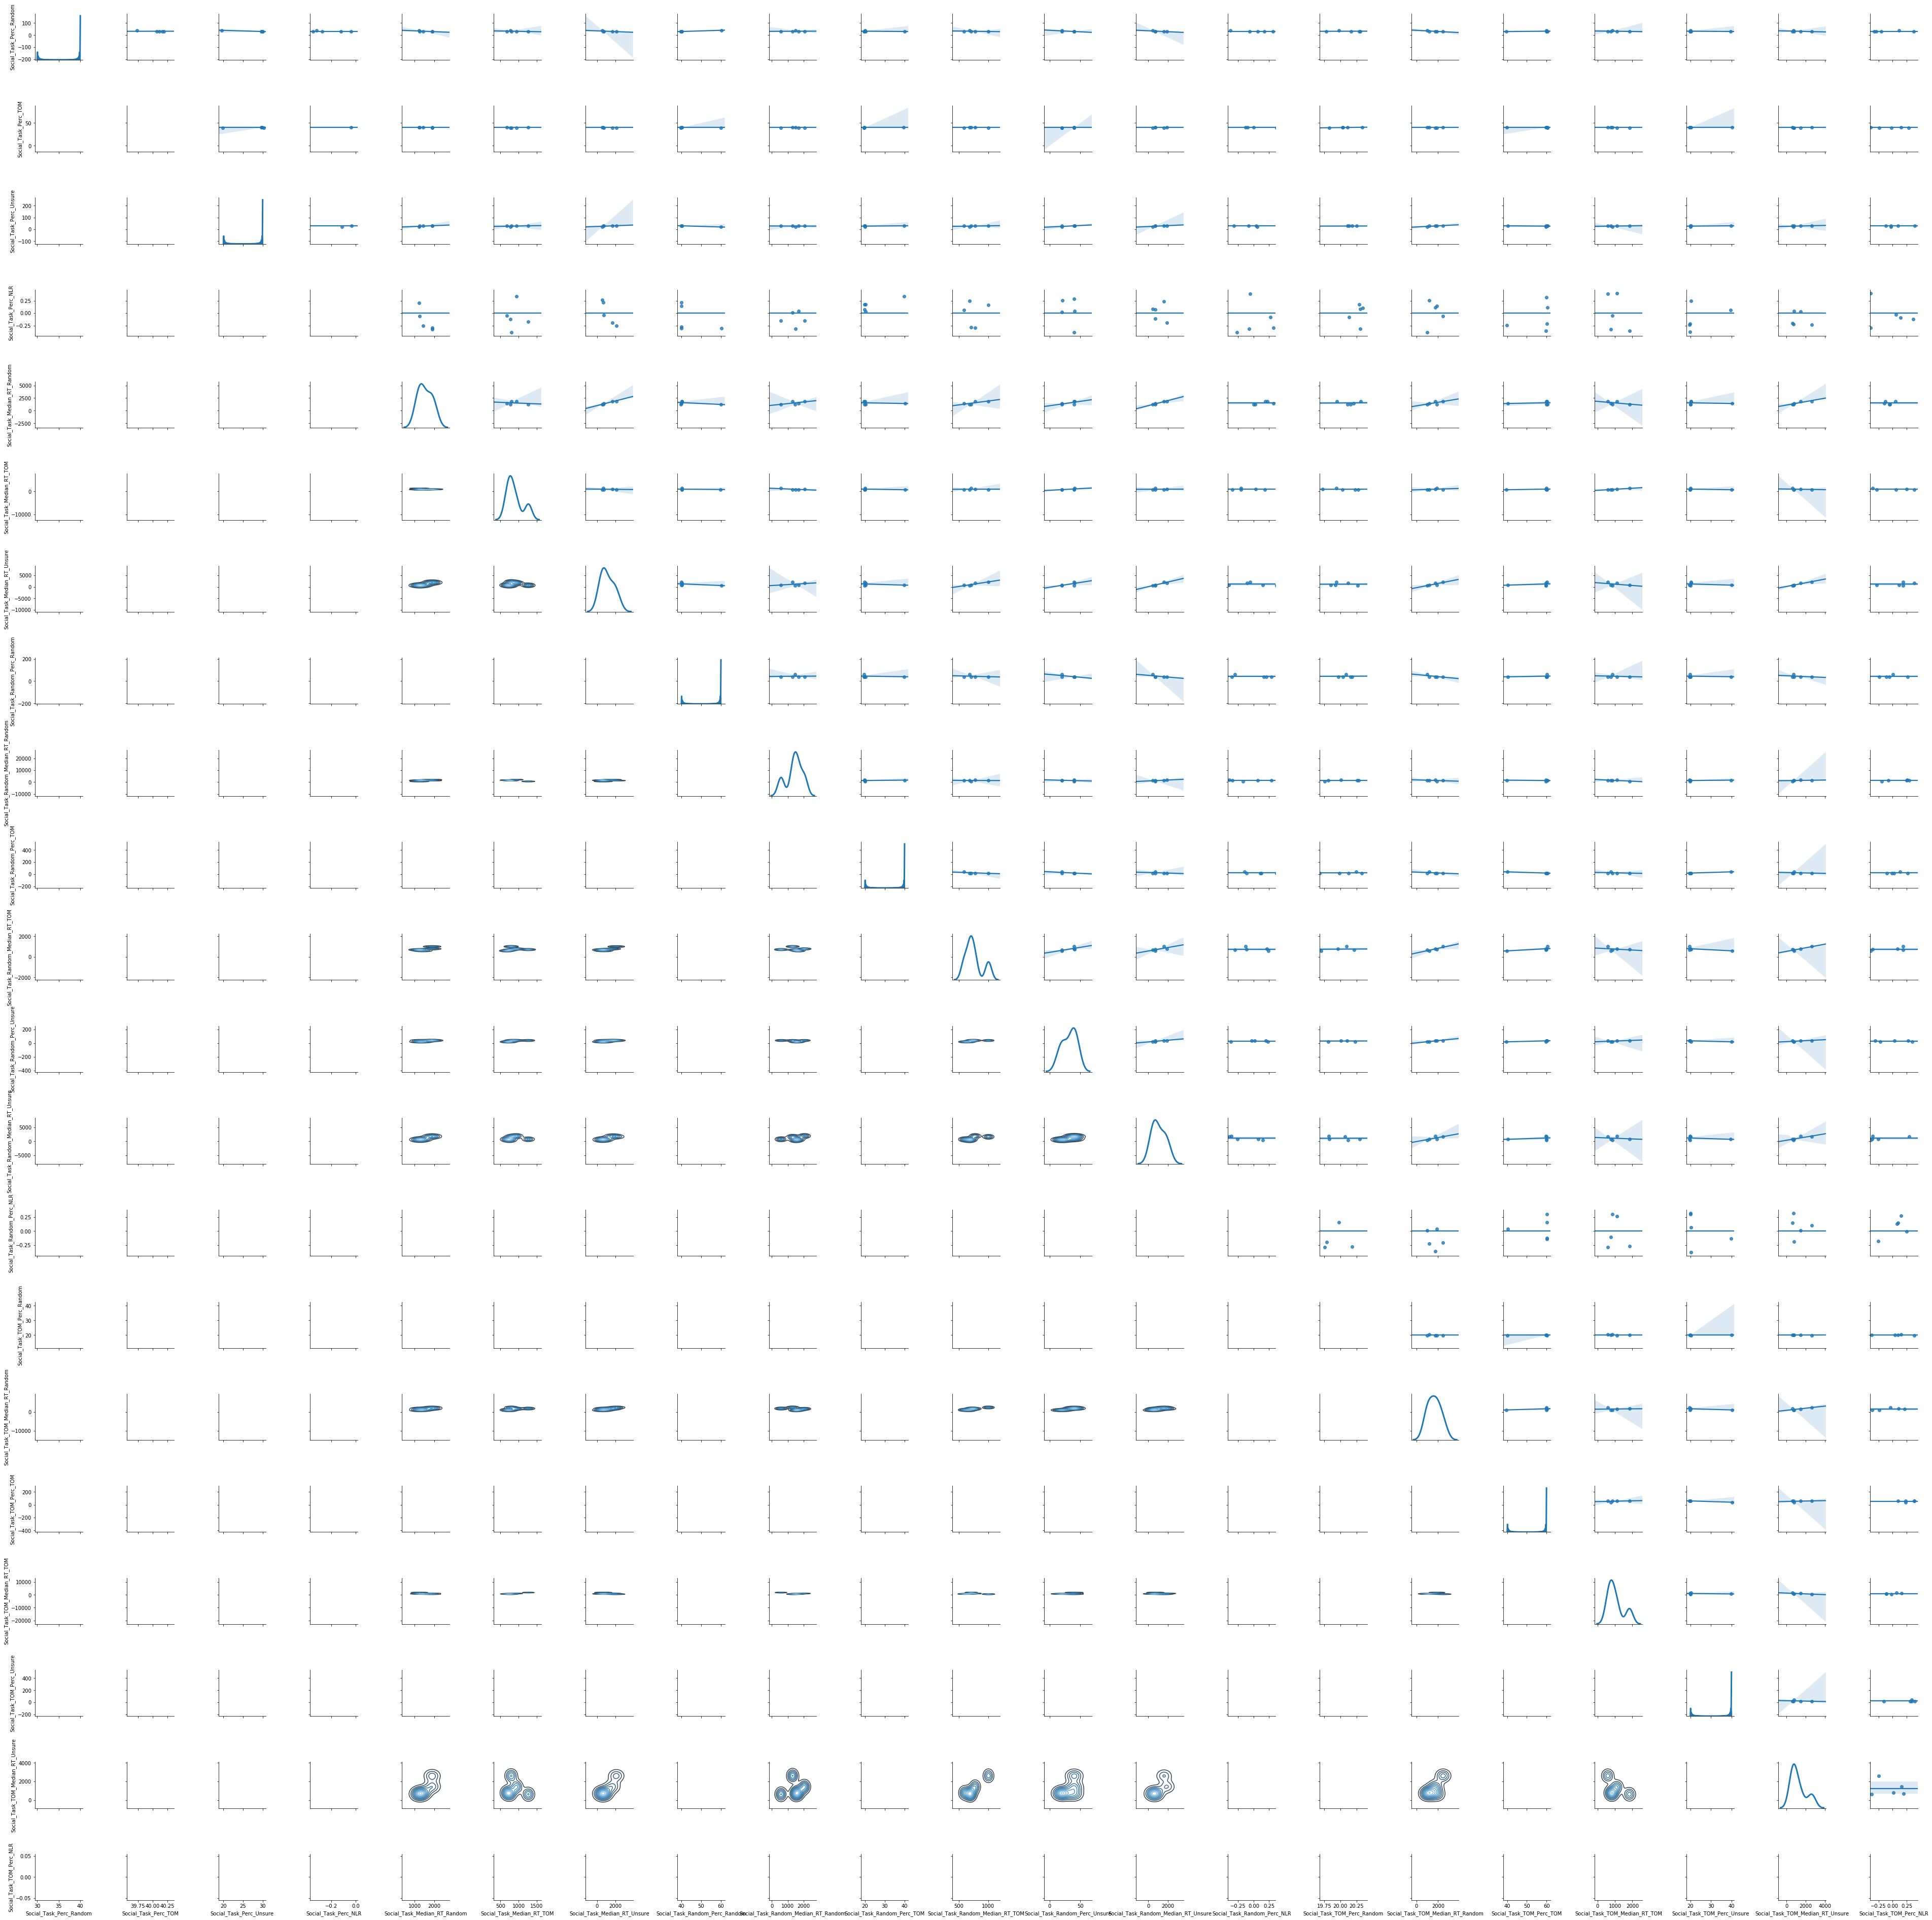

In [36]:
d={}
sh={}
for ind,val in enumerate(behav_soc):
        d["_{0}".format(ind)]=data_soc[[val]].dropna()
        sh["shapiro_results_{0}".format(ind)] = scipy.stats.shapiro(d["_{0}".format(ind)])

dict_sw = {'DF':[len( d["_{0}".format(ind)]) - 1 for ind, val in enumerate(behav_soc)],
           'Test Statistic': [sh["shapiro_results_{0}".format(ind)][0] for ind, val in enumerate(behav_soc)],
           'p-value': [sh["shapiro_results_{0}".format(ind)][1] for ind, val in enumerate(behav_soc)]}

df = pd.DataFrame(dict_sw,index=behav_soc)
print('Shapiro-test')
display(df)


# PLot dist
g = sns.PairGrid(data_soc.get(behav_soc).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

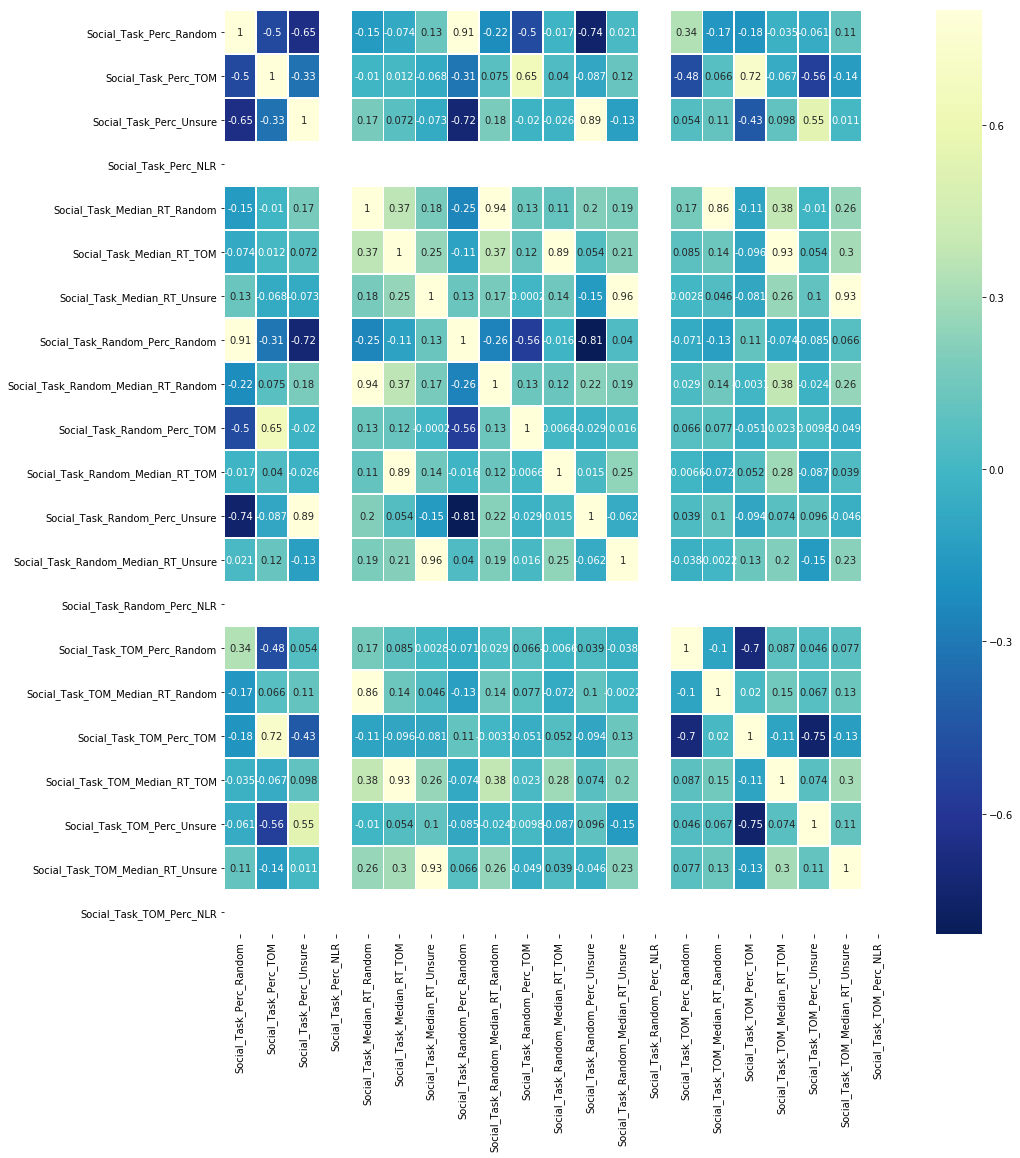

In [40]:
f, ax = plt.subplots(figsize=(15, 17))
sns.heatmap(data_soc.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

## Select tasks 

In [64]:
task_select = ["Emotion_Task_Acc", "Emotion_Task_Median_RT",
               "Gambling_Task_Median_RT_Larger",
               "Language_Task_Acc", "Language_Task_Median_RT",
               "Relational_Task_Acc", "Relational_Task_Median_RT",
               "Social_Task_Random_Perc_Random", "Social_Task_Random_Median_RT_Random","Social_Task_TOM_Perc_TOM", "Social_Task_TOM_Median_RT_TOM",
               "WM_Task_2bk_Acc", "WM_Task_2bk_Median_RT", "WM_Task_0bk_Acc", "WM_Task_0bk_Median_RT"]

In [65]:
data_select = data.get(task_select)

Shapiro-test


DF  Test Statistic       p-value
Emotion_Task_Acc                     1048        0.502845  0.000000e+00
Emotion_Task_Median_RT               1048        0.972347  2.978292e-13
Gambling_Task_Median_RT_Larger       1075        0.951757  2.605738e-18
Language_Task_Acc                    1053        0.966186  6.155517e-15
Language_Task_Median_RT              1053        0.984515  3.857635e-09
Relational_Task_Acc                  1044        0.983312  1.436115e-09
Relational_Task_Median_RT            1044        0.997495  1.086660e-01
Social_Task_Random_Perc_Random       1053        0.745681  2.283684e-37
Social_Task_Random_Median_RT_Random  1045        0.933727  3.888109e-21
Social_Task_TOM_Perc_TOM             1052        0.523108  0.000000e+00
Social_Task_TOM_Median_RT_TOM        1051        0.929201  7.027017e-22
WM_Task_2bk_Acc                      1081        0.931175  6.744100e-22
WM_Task_2bk_Median_RT                1078        0.995317  2.103968e-03
WM_Task_0bk_Acc                      1090        0.795141  5.901651e-35
WM_Task_0bk_Median_RT                1076        0.938335  1.014609e-20

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. /

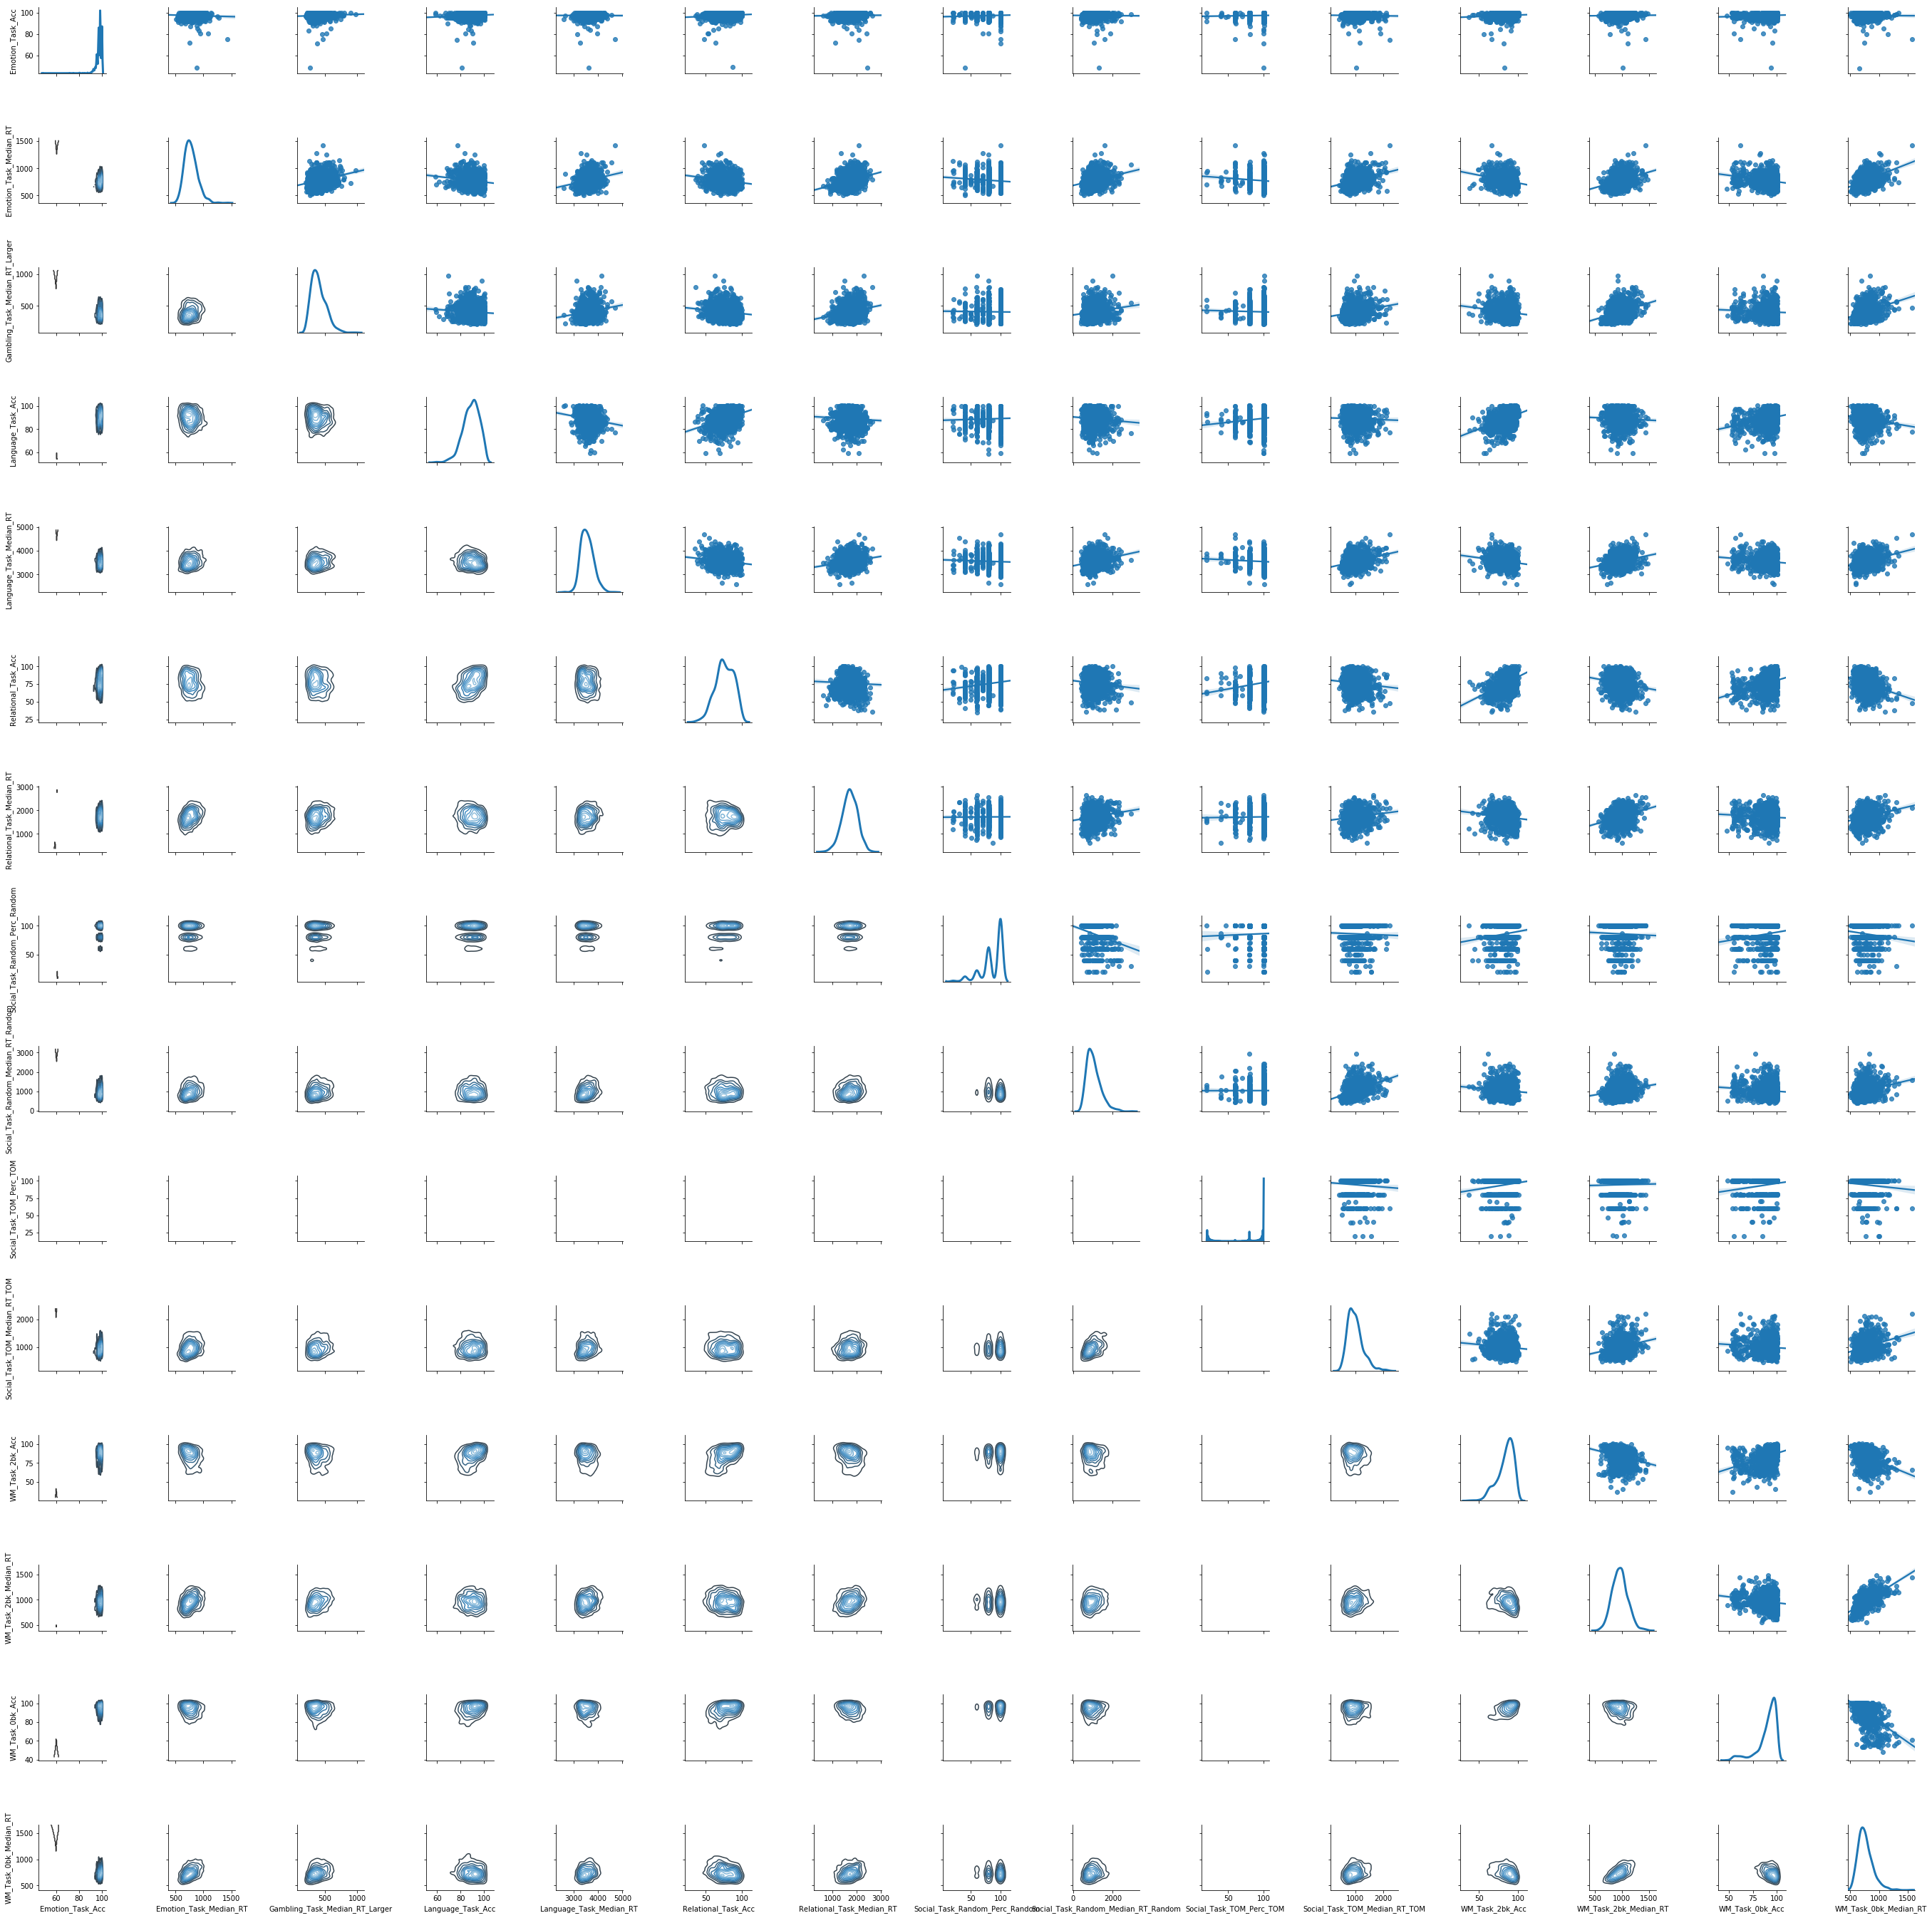

In [57]:
d={}
sh={}
for ind,val in enumerate(task_select):
        d["_{0}".format(ind)]=data_select[[val]].dropna()
        sh["shapiro_results_{0}".format(ind)] = scipy.stats.shapiro(d["_{0}".format(ind)])

dict_sw = {'DF':[len( d["_{0}".format(ind)]) - 1 for ind, val in enumerate(task_select)],
           'Test Statistic': [sh["shapiro_results_{0}".format(ind)][0] for ind, val in enumerate(task_select)],
           'p-value': [sh["shapiro_results_{0}".format(ind)][1] for ind, val in enumerate(task_select)]}

df = pd.DataFrame(dict_sw,index=task_select)
print('Shapiro-test')
display(df)


# PLot dist
g = sns.PairGrid(data_select.get(task_select).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

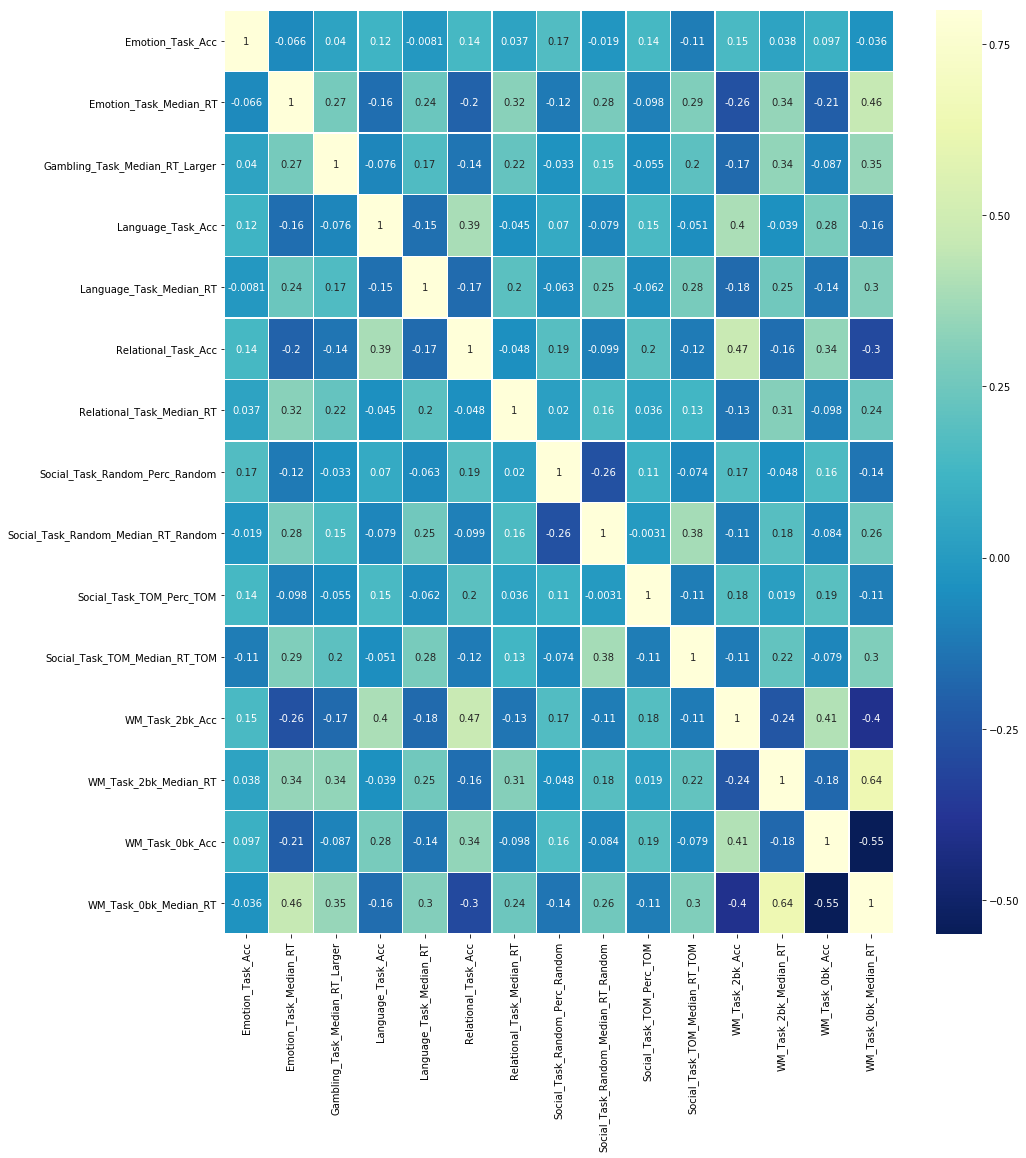

In [58]:
f, ax = plt.subplots(figsize=(15, 17))
sns.heatmap(data_select.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8, cmap='YlGnBu_r')

In [111]:
# Save data frame
df_task_select = data[["Subject"]+task_select]
df_task_select.dropna(inplace=True)
df_task_select.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/task_perform_select.csv'),index=False)
df_task_select.head()

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Subject  Emotion_Task_Acc  Emotion_Task_Median_RT  \
1   100206            95.278                 664.500   
2   100307            95.556                 618.875   
3   100408           100.000                 744.625   
5   101006            96.944                 760.875   
6   101107            98.611                 672.000   

   Gambling_Task_Median_RT_Larger  Language_Task_Acc  Language_Task_Median_RT  \
1                         312.375             96.875                 3208.000   
2                         293.250             80.417                 3463.375   
3                         519.875             97.222                 3664.000   
5                         470.125             83.611                 3414.250   
6                         268.625             82.917                 4081.375   

   Relational_Task_Acc  Relational_Task_Median_RT  \
1               73.750                   1587.875   
2               96.250                   1765.250   
3               80.417                   1829.250   
5               53.333                   1504.375   
6               54.167                   1094.250   

   Social_Task_Random_Perc_Random  Social_Task_Random_Median_RT_Random  \
1                            20.0                                683.0   
2                            80.0                                726.8   
3                            80.0                               1341.6   
5                            80.0                               1172.8   
6                            80.0                               1042.8   

   Social_Task_TOM_Perc_TOM  Social_Task_TOM_Median_RT_TOM  WM_Task_2bk_Acc  \
1                     100.0                         1052.8           83.507   
2                      80.0                          566.4           77.083   
3                     100.0                         1295.4           92.708   
5                      60.0                         1538.0           58.681   
6                     100.0                          923.8           77.083   

   WM_Task_2bk_Median_RT  WM_Task_0bk_Acc  WM_Task_0bk_Median_RT  
1                921.208           99.062                625.500  
2                862.500           93.125                725.667  
3               1065.958           89.688                848.938  
5                625.700           86.250                699.312  
6                813.091           92.188                723.104

### Normalize database

In [112]:
# Make matrix out of the remaining guys except subject ID column
pheno_mat = df_task_select.drop(columns="Subject").values
# Normalize these guys by column
pheno_norm = (pheno_mat - np.mean(pheno_mat, 0))/np.std(pheno_mat, 0, ddof=1)

In [113]:
# Save normalized pheno
ind = df_task_select.index
pheno_norm_df = pd.DataFrame(pheno_norm, columns=df_task_select.drop(columns="Subject").columns.get_values(),index=ind)
# merge back ID
merged_pheno_norm = pd.merge(df_task_select[["Subject"]], pheno_norm_df, how='right', left_index=True, right_index=True)
merged_pheno_norm.loc[:,'Subject'] = 'HCP' + merged_pheno_norm['Subject'].astype(str)
merged_pheno_norm.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/task_perform_select_norm.csv'),index=False)
merged_pheno_norm.head()

Subject  Emotion_Task_Acc  Emotion_Task_Median_RT  \
1  HCP100206         -0.786249               -0.961612   
2  HCP100307         -0.691942               -1.354335   
3  HCP100408          0.815612               -0.271925   
5  HCP101006         -0.221086               -0.132051   
6  HCP101107          0.344417               -0.897055   

   Gambling_Task_Median_RT_Larger  Language_Task_Acc  Language_Task_Median_RT  \
1                       -0.842270           1.136412                -1.319090   
2                       -1.013115          -1.239516                -0.343549   
3                        1.011337           1.186506                 0.422845   
5                        0.566918          -0.778421                -0.531208   
6                       -1.233091          -0.878609                 2.017232   

   Relational_Task_Acc  Relational_Task_Median_RT  \
1            -0.198650                  -0.427552   
2             1.591281                   0.140082   
3             0.331727                   0.344895   
5            -1.822872                  -0.694768   
6            -1.756525                  -2.007247   

   Social_Task_Random_Perc_Random  Social_Task_Random_Median_RT_Random  \
1                       -3.613889                            -0.978018   
2                       -0.324328                            -0.856815   
3                       -0.324328                             0.844450   
5                       -0.324328                             0.377349   
6                       -0.324328                             0.017615   

   Social_Task_TOM_Perc_TOM  Social_Task_TOM_Median_RT_TOM  WM_Task_2bk_Acc  \
1                  0.475928                       0.193927        -0.025941   
2                 -1.199984                      -1.558275        -0.638502   
3                  0.475928                       1.067866         0.851421   
5                 -2.875895                       1.941805        -2.393226   
6                  0.475928                      -0.270781        -0.638502   

   WM_Task_2bk_Median_RT  WM_Task_0bk_Acc  WM_Task_0bk_Median_RT  
1              -0.296939         0.848286              -1.059832  
2              -0.708941         0.276491              -0.286743  
3               0.718889        -0.054527               0.664662  
5              -2.370758        -0.385642              -0.490151  
6              -1.055684         0.186248              -0.306524